In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [59]:
df = pd.read_csv('winequalityN.csv')
# df = df[['type', 'fixed acidity', 'quality']]
df['type'] = df['type'].astype("category").cat.codes
# df.isnull().sum()
# df.info()
# df.describe()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [60]:
# df[df.duplicated()].sum()
soDuLieuTrung = df.duplicated(keep='first').sum()
print(f'Có {soDuLieuTrung} bản dữ liệu trùng nhau!!')
soDuLieuNull = df.isnull().values.sum()
print(f'Có {soDuLieuNull} bản ghi có dữ liệu trống, chiếm tối đa {soDuLieuNull*100/len(df):.2f}%!!')

Có 1168 bản dữ liệu trùng nhau!!
Có 38 bản ghi có dữ liệu trống, chiếm tối đa 0.58%!!


In [61]:
clean_df = df.drop_duplicates(keep='first')
clean_df = clean_df.dropna()

soDuLieuTrung = clean_df.duplicated(keep='first').sum()
print(f'Có {soDuLieuTrung} bản dữ liệu trùng nhau!!')
soDuLieuNull = clean_df.isnull().values.sum()
print(f'Có {soDuLieuNull} bản ghi có dữ liệu trống, chiếm tối đa {soDuLieuNull*100/len(df):.2f}%!!')

Có 0 bản dữ liệu trùng nhau!!
Có 0 bản ghi có dữ liệu trống, chiếm tối đa 0.00%!!


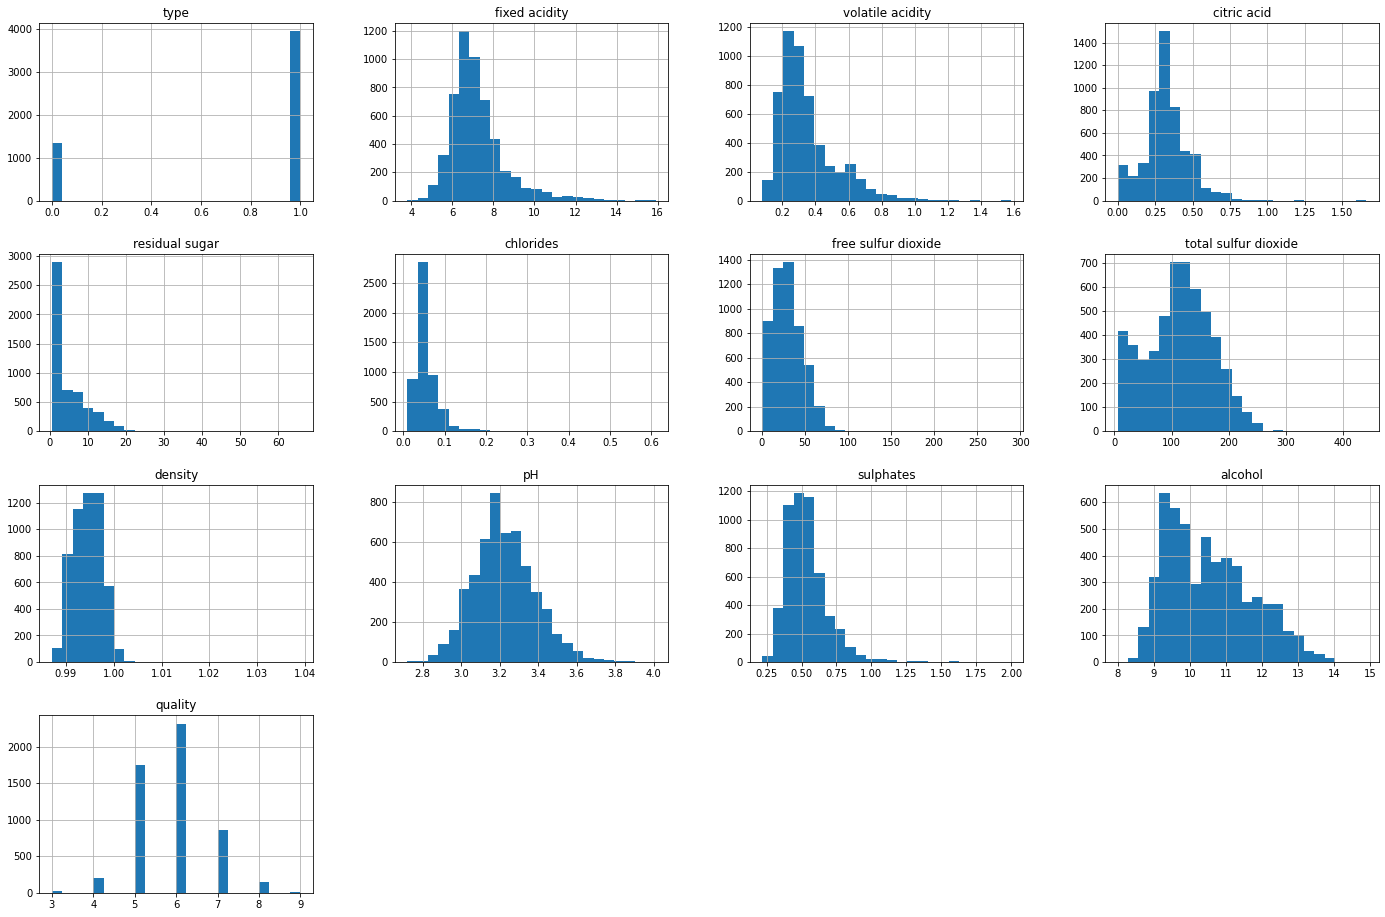

In [62]:
clean_df.hist(bins = 24, figsize = (24, 16));

In [63]:
# plt.figure(figsize = (24, 16))
# sns.boxplot(data=clean_df)
# plt.xticks(rotation = 20)

# plt.show()

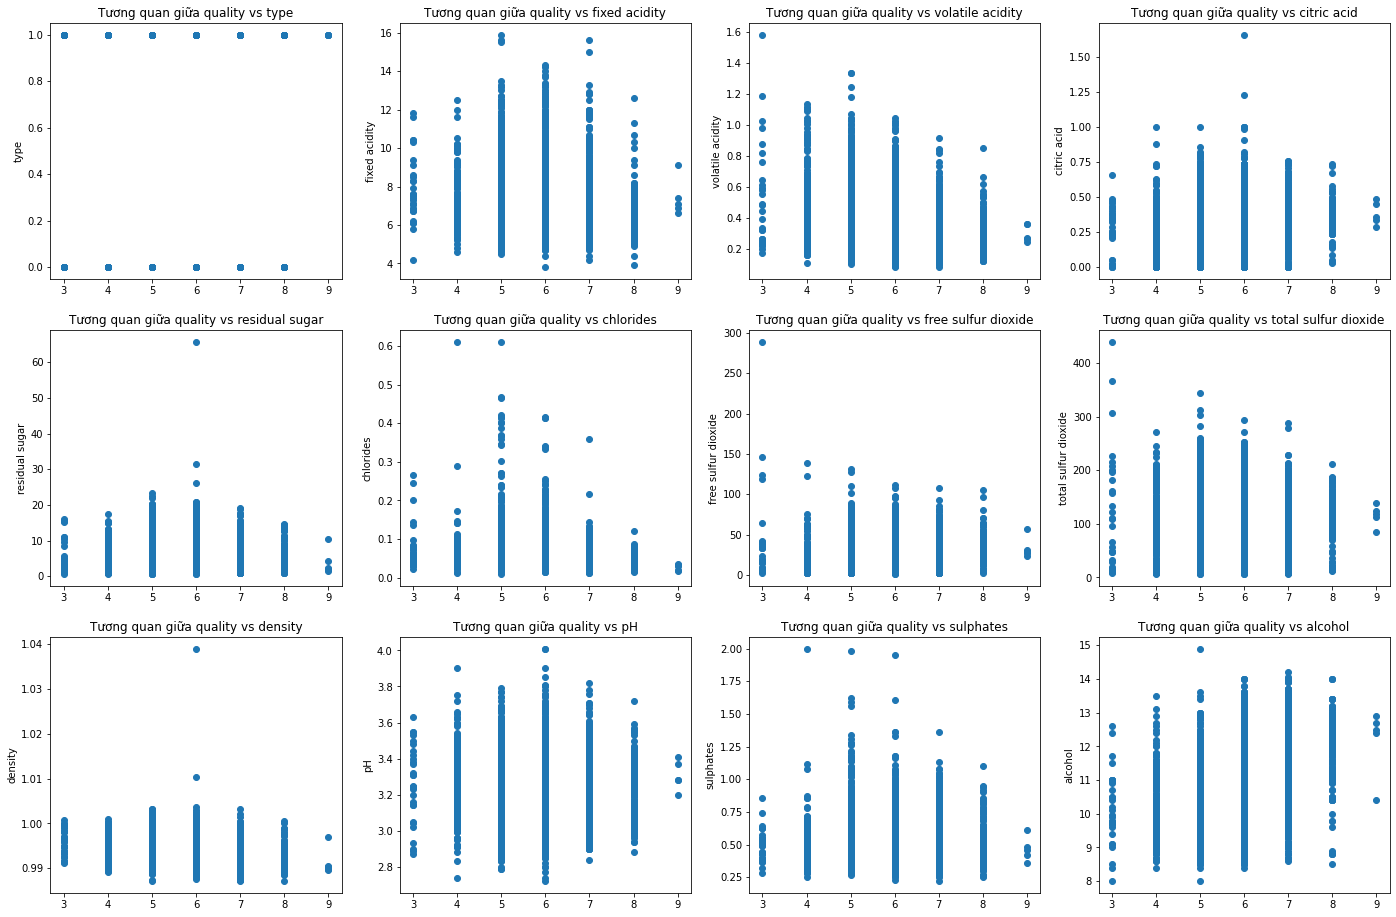

In [64]:
f, pos = plt.subplots(3, 4, figsize = (24, 16))
pos[0, 0].scatter(clean_df['quality'], clean_df['type'])
pos[0, 1].scatter(clean_df['quality'], clean_df['fixed acidity'])
pos[0, 2].scatter(clean_df['quality'], clean_df['volatile acidity'])
pos[0, 3].scatter(clean_df['quality'], clean_df['citric acid'])
pos[1, 0].scatter(clean_df['quality'], clean_df['residual sugar'])
pos[1, 1].scatter(clean_df['quality'], clean_df['chlorides'])
pos[1, 2].scatter(clean_df['quality'], clean_df['free sulfur dioxide'])
pos[1, 3].scatter(clean_df['quality'], clean_df['total sulfur dioxide'])
pos[2, 0].scatter(clean_df['quality'], clean_df['density'])
pos[2, 1].scatter(clean_df['quality'], clean_df['pH'])
pos[2, 2].scatter(clean_df['quality'], clean_df['sulphates'])
pos[2, 3].scatter(clean_df['quality'], clean_df['alcohol'])

index = 0
for i in range(3):
    for j in range(4):
        pos[i, j].set_title(f'Tương quan giữa quality vs {clean_df.columns[index]}')
        pos[i, j].set(ylabel = f'{clean_df.columns[index]}')
        index += 1

plt.show()

Thấy sự tương quan cao là quality với volatile acidity, chlorides, free surfer dioxit, alcohol nên dùng thuộc tính này để xét.

In [77]:
clean_df1 = clean_df2 = clean_df[['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol', 'quality']]
# clean_df1 = clean_df2 = clean_df.copy()
clean_df1.head()

,volatile acidity,chlorides,free sulfur dioxide,alcohol,quality
0,0.27,0.045,45.0,8.8,6
1,0.30,0.049,14.0,9.5,6
2,0.28,0.050,30.0,10.1,6
3,0.23,0.058,47.0,9.9,6
6,0.32,0.045,30.0,9.6,6


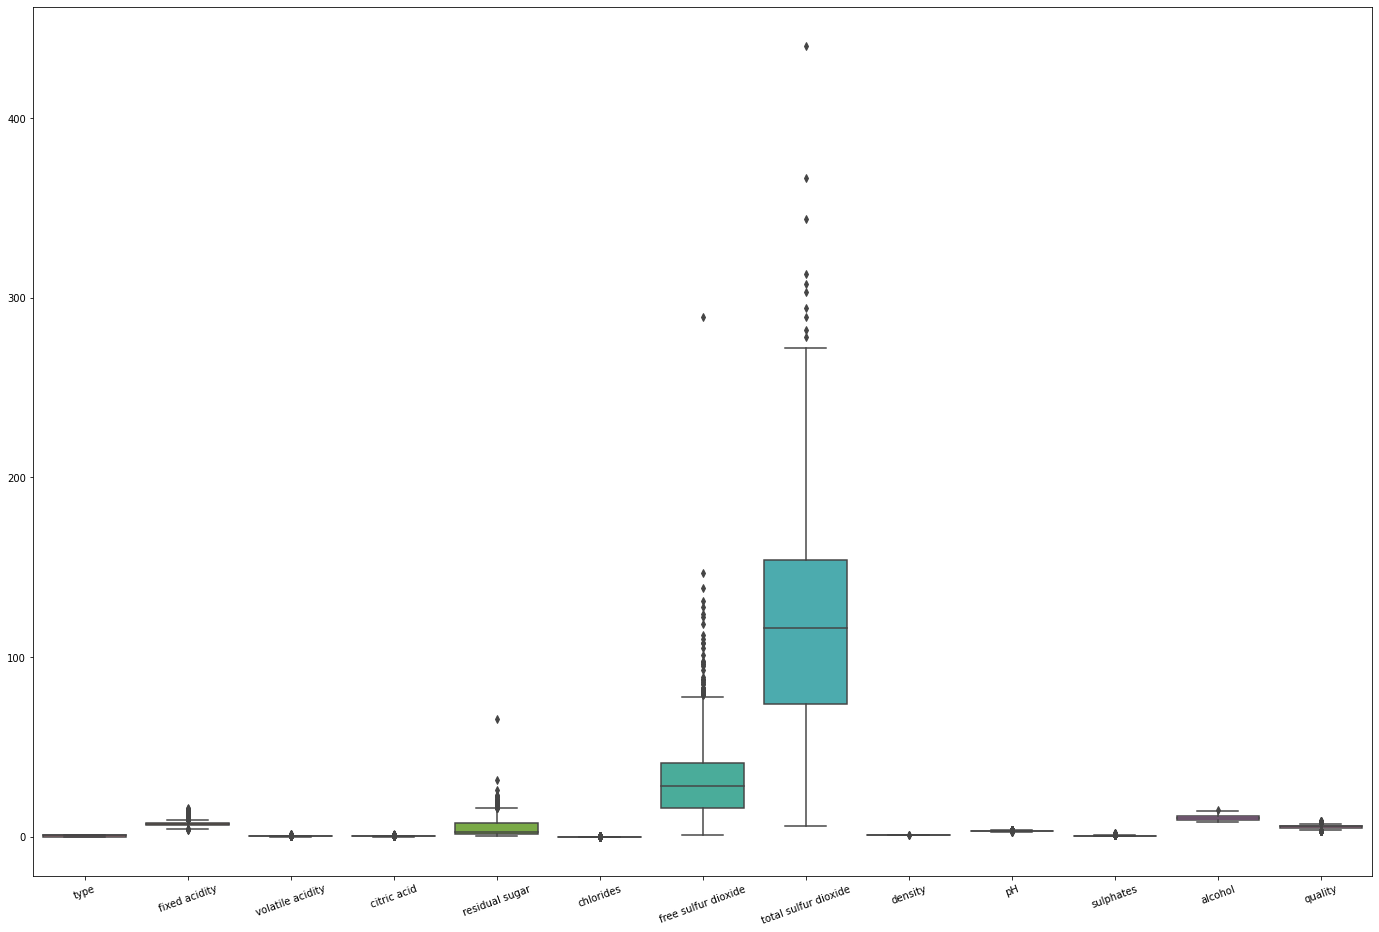

In [66]:
plt.figure(figsize = (24, 16))
sns.boxplot(data = clean_df1)
plt.xticks(rotation = 20)

plt.show()

Có ngoại lệ -> xử lý ngoại lệ

In [78]:
from sklearn.preprocessing import MinMaxScaler

x = clean_df1[clean_df1.columns.drop('quality')]
scaler = MinMaxScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
# normalized_x
y = clean_df1['quality']

x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.3, random_state = 994)
classifier = LogisticRegression()
model = classifier.fit(x_train, y_train)
tyle = model.score(x_test, y_test)
print(str(tyle))

0.5223410950283197


In [68]:
def PhanLoaiRuou(x):
    if x <= 5:
        return 3
    elif x < 8:
        return 2
    else:
        return 1

In [79]:
clean_df3 = clean_df2.copy()

clean_df3['quality'] = clean_df3['quality'].apply(PhanLoaiRuou)
clean_df3['quality'].value_counts()

2    3163
3    1979
1     153
Name: quality, dtype: int64

In [80]:
max = 0
index = 0

for i in range(1000):
    x = clean_df3[clean_df3.columns.drop('quality')]
    scaler = MinMaxScaler()
    normalized_x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    # normalized_x
    y = clean_df3['quality']

    x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.3, random_state = i)
    classifier = LogisticRegression()
    model = classifier.fit(x_train, y_train)
    tyle = model.score(x_test, y_test)
    if tyle > max:
        max = tyle
        index = i

In [83]:
# index = 207 994
x = clean_df3[clean_df3.columns.drop('quality')]
scaler = MinMaxScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
# normalized_x
y = clean_df3['quality']

x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.3, random_state = 994)
classifier = LogisticRegression()
model = classifier.fit(x_train, y_train)
tyle = model.score(x_test, y_test)
print(str(tyle))

0.7331655129011957
